## Recell Project

In this project I will be analyzing the data provided to build a linear regression model to predict the price of a used phone and identify factors that significantly influence it. Let's get started!

In [1]:
#I am starting off by importing the different libraries 
import warnings
warnings.filterwarnings('ignore') #this will ignore warnings 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("used_phone_data.csv") #importing the dataset

In [3]:
df.shape

(3571, 15)

There are 3571 rows and 15 columns.

In [4]:
# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that I get the same random results every time
np.random.seed(1)
df.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


In [5]:
df.info() #lets see the info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


Based off of this, I can see that there are missing values in main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight. There are 9 float datatypes, 2 int64 datatypes, and 4 object datatypes.

In [6]:
# looking at which columns have the missing values in descending order
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

I am going to drop the missing values from the dataset. This is because the missing data is such a small amount that it won't drastically change the output.

In [7]:
df2=df.dropna(axis=0) #I am going to drop the missing values

In [8]:
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


In [9]:
df2.isnull().sum() #checking to see how many missing values there are, there should be none

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

There are no missing values now.

In [10]:
# Lets look at the statistical summary of the data
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3368,33,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3368,4,Android,3056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3368.0,NaN,NaN,NaN,14.575095,5.045491,2.7,11.43,13.49,16.03,46.36
4g,3368,2,yes,2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3368,2,no,3283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3368.0,NaN,NaN,NaN,9.419519,4.803271,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3368.0,NaN,NaN,NaN,6.096437,6.513867,0.3,2.0,5.0,8.0,32.0
int_memory,3368.0,NaN,NaN,NaN,52.056596,85.108736,0.005,16.0,32.0,64.0,1024.0
ram,3368.0,NaN,NaN,NaN,3.98095,1.271313,0.03,4.0,4.0,4.0,16.0
battery,3368.0,NaN,NaN,NaN,3008.418795,1361.468949,80.0,2050.0,3000.0,3900.0,12000.0


There are 33 different phone brand names, the most occuring 509 times. 
There are 4 unique OS on which the phone runs, the most occuring 3056 times. 
The mean of the screen size is 14.58 cm.
The phones have been used on average for 695 days, or almost two years. 
The average price of the used phone is cheaper than the price of a new phone that is the same model.

In [11]:
#I am going to convert a few different datatypes to categories
df2["brand_name"]=df2["brand_name"].astype("category")
df2["os"]=df2["os"].astype("category")
df2["4g"]=df2["4g"].astype("category")
df2["5g"]=df2["5g"].astype("category")
df2["release_year"]=df2["release_year"].astype("category")

In [12]:
df2.info() #lets see the change on release year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3368 non-null   category
 1   os                3368 non-null   category
 2   screen_size       3368 non-null   float64 
 3   4g                3368 non-null   category
 4   5g                3368 non-null   category
 5   main_camera_mp    3368 non-null   float64 
 6   selfie_camera_mp  3368 non-null   float64 
 7   int_memory        3368 non-null   float64 
 8   ram               3368 non-null   float64 
 9   battery           3368 non-null   float64 
 10  weight            3368 non-null   float64 
 11  release_year      3368 non-null   category
 12  days_used         3368 non-null   int64   
 13  new_price         3368 non-null   float64 
 14  used_price        3368 non-null   float64 
dtypes: category(5), float64(9), int64(1)
memory usage: 308.0 KB


## EDA

I am now moving onto the Exploratory Data Analysis side

In [13]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
df2.brand_name.value_counts() #I would like to see the brand name next to it's count

Others        509
Samsung       364
Huawei        264
LG            212
Lenovo        172
ZTE           137
Alcatel       125
Asus          122
Micromax      120
Honor         118
Nokia         111
Xiaomi        110
HTC           110
Oppo          109
Vivo          103
Motorola       92
Sony           81
Apple          59
Gionee         56
Acer           51
Panasonic      45
Meizu          44
XOLO           42
Celkon         37
Lava           34
Karbonn        30
Spice          30
Microsoft      21
Coolpad        19
BlackBerry     18
Google         13
OnePlus         5
Realme          5
Name: brand_name, dtype: int64

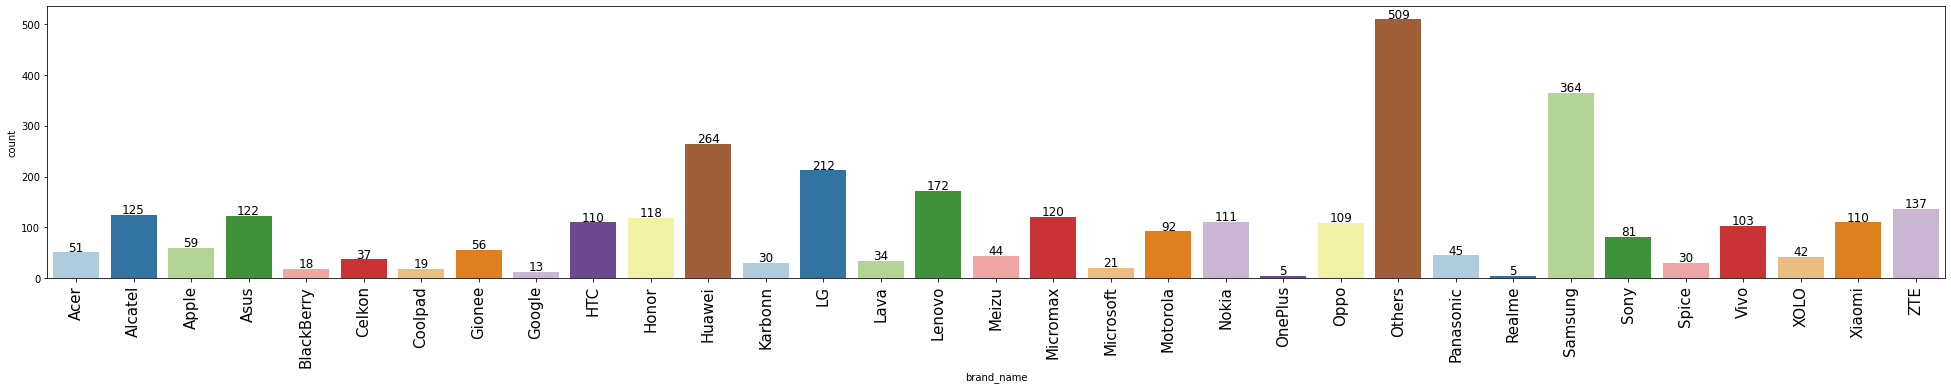

In [15]:
labeled_barplot(df2, "brand_name") #to see this visually in a barplot

In [16]:
#how does the new price vary amongst different brand names
df2.groupby("brand_name")["new_price"].mean()

brand_name
Acer          172.867647
Alcatel       142.499092
Apple         639.004941
Asus          239.327004
BlackBerry    204.589444
Celkon         60.956486
Coolpad       189.654211
Gionee        255.379286
Google        408.600000
HTC           249.853818
Honor         235.897915
Huawei        323.960091
Karbonn       110.384333
LG            242.218203
Lava          109.042059
Lenovo        193.358779
Meizu         240.035227
Micromax      106.964667
Microsoft     158.517143
Motorola      195.497989
Nokia         138.888532
OnePlus       331.980000
Oppo          317.009761
Others        191.112094
Panasonic     166.857111
Realme        137.888000
Samsung       293.854500
Sony          260.943210
Spice          98.000000
Vivo          316.331403
XOLO          134.247619
Xiaomi        251.303264
ZTE           209.181460
Name: new_price, dtype: float64

The average prices of the new phones vary from 60 euros to 639 euros. Apple and Google have the highest average price. The lowest average price being Celkon and Spice, which are brands I have never heard of. 

In [17]:
#how does the used price vary amongst different brand names 
df2.groupby("brand_name")["used_price"].mean()

brand_name
Acer           63.798431
Alcatel        55.326080
Apple         293.228814
Asus           94.062213
BlackBerry     83.033333
Celkon         22.648378
Coolpad        67.935789
Gionee         91.881964
Google        206.422308
HTC            99.626000
Honor         132.285932
Huawei        176.256894
Karbonn        38.069333
LG            115.853726
Lava           39.424118
Lenovo         77.147500
Meizu          93.805455
Micromax       38.134417
Microsoft      53.213333
Motorola       88.336087
Nokia          63.505045
OnePlus       104.578000
Oppo          150.587156
Others         78.492102
Panasonic      57.668667
Realme         66.348000
Samsung       132.083462
Sony           99.555556
Spice          32.299667
Vivo          156.784757
XOLO           48.848095
Xiaomi        123.499273
ZTE            86.081533
Name: used_price, dtype: float64

The price of the used phone varies from 32 euros to 293 euros. It is interesting to see that Apple and Google are still the highest, but not as significantly high as they were compared to their new price.

In [18]:
df2.groupby("release_year")["used_price"].mean() #I want to compare the release year to the used price

release_year
2013     58.283311
2014     69.732779
2015     73.329122
2016     84.403544
2017    101.346013
2018    147.249221
2019    192.116921
2020    244.833057
Name: used_price, dtype: float64

As expected, the older the phone, the cheaper it is. The newer the used phone is, it will be more expensive.

## Univariate Analysis

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Let's explore the dependent variable, "used_price"

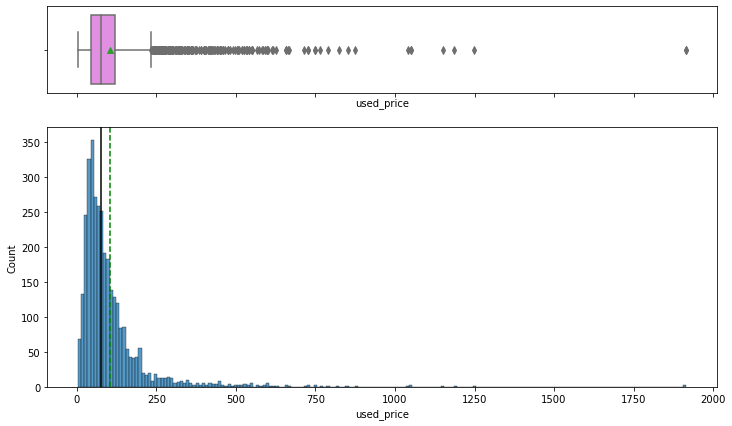

In [20]:
histogram_boxplot(df2, "used_price")

There are multiple outliers in this data set. This is also right-skewed, which means that some used prices are very high. The mean price appears to be around 125 euros.

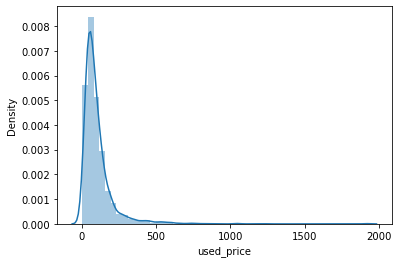

In [21]:
sns.distplot(df2['used_price']); #we can also use this type of histogram to view the data

Now, let's visually explore the new price of the phones.

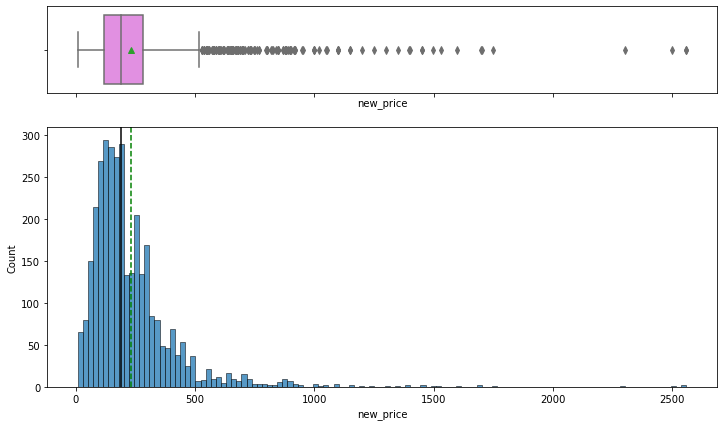

In [22]:
histogram_boxplot(df2, "new_price") #another histogram boxplot

There are multiple outliers in this graph. This is right skewed, meaning that there are some phones that are very expensive. The mean price for the new phone is around 250, which seems about double to the used price of the phones. 

Let's explore screen size 

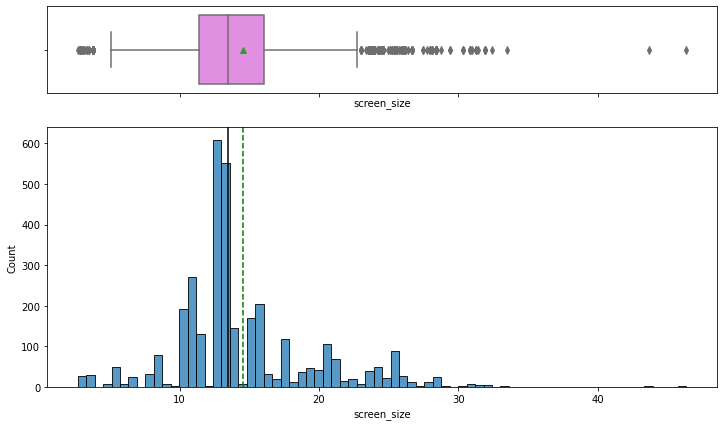

In [23]:
histogram_boxplot(df2, "screen_size")

This is interesting. The mean screen size for the phones are around 15 cm. This graph has outliers on both sides, meaning there are phones that have very small screen sizes and very large screen sizes. 

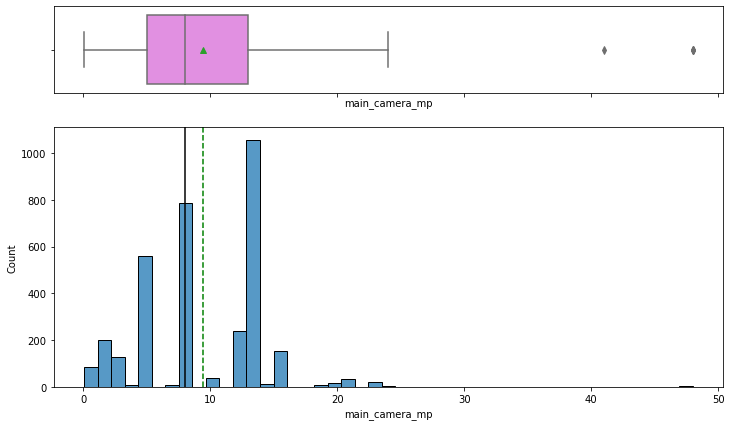

In [24]:
histogram_boxplot(df2, "main_camera_mp")

This is showing the resolution of the rear camera in mega pixels. The average is around 9 mega pixels, but there are only a few phones that have higher mega pixels. 

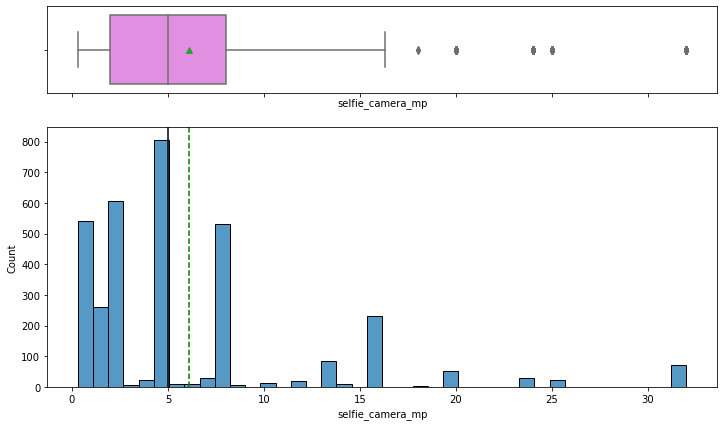

In [25]:
histogram_boxplot(df2, "selfie_camera_mp")

The selfie camera average mega pixels is smaller than the rear camera at about 6 mega pixels. There are outliers that do have improved selfie camera quality.

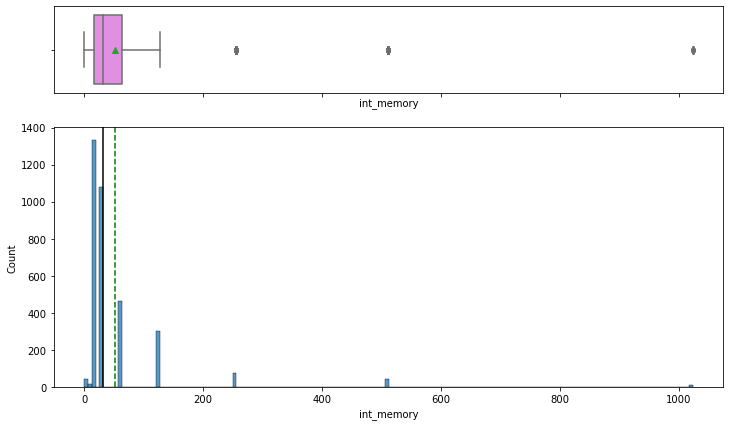

In [26]:
histogram_boxplot(df2, "int_memory")

There are some outliers of internal memory (ROM) in GB. This is a skewed right graph, meaning there are some phones with higher memory, but the average lies around 75 GB. 

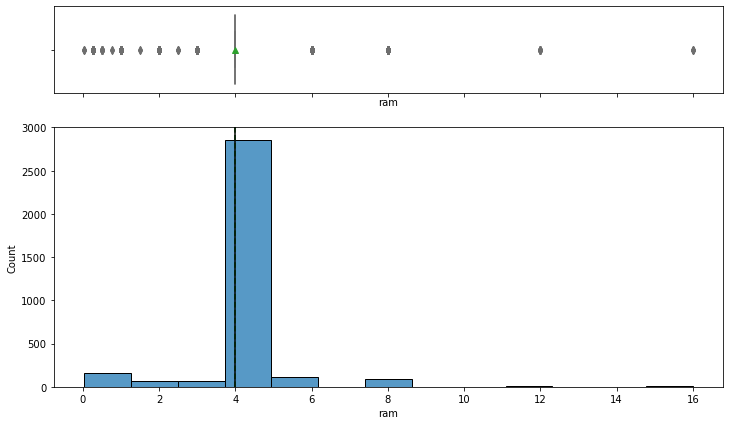

In [27]:
histogram_boxplot(df2, "ram")

This is interesting, the average is around 4 RAM in GB, but it does seem to have outliers on both ends. 

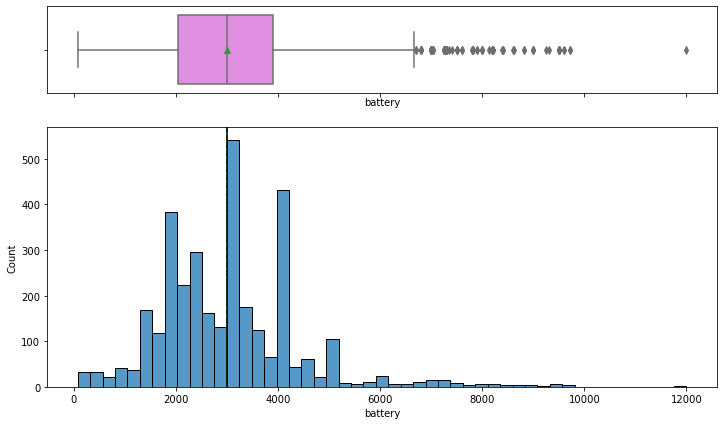

In [28]:
histogram_boxplot(df2, "battery")

The average energy capacity of the phone battery is around 3000 mAh. There are several outliers, there are many phones that have a higher energy capacity. 

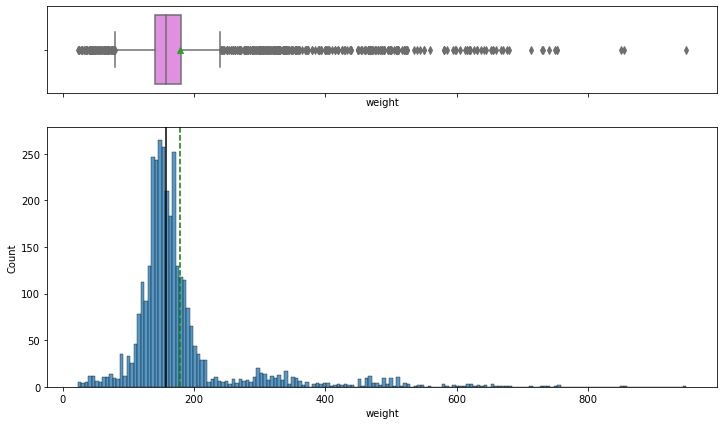

In [29]:
histogram_boxplot(df2, "weight")

The average weight of the phone is just under 200 grams. However, there are several outliers on either side. Meaning there are phones that are very light and phones that are heavier. The data is dispersed.

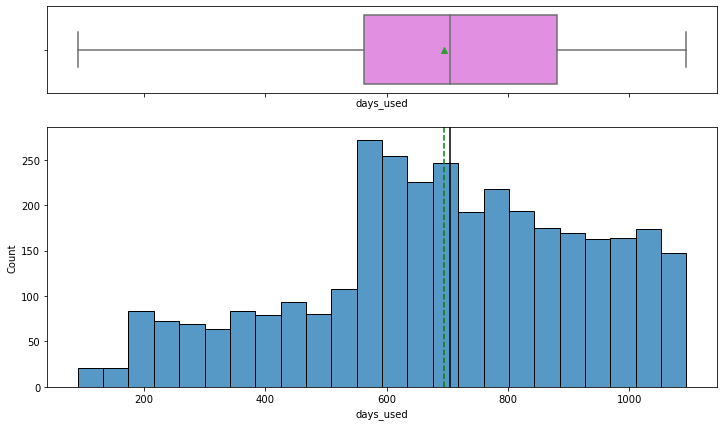

In [30]:
histogram_boxplot(df2, "days_used")

The average amount of days used for the phone is around 700 days. There does not seem to be any outliers. 

In [31]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

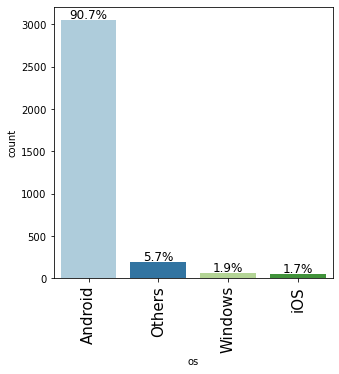

In [32]:
labeled_barplot(df2, "os", perc=True)

There are 4 main OS on which the phone runs. Android is the majority, with others second, then Windows, then iOS. 

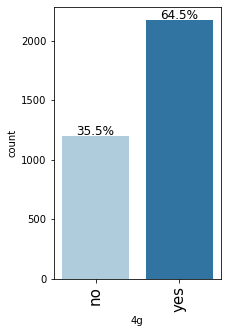

In [33]:
labeled_barplot(df2, "4g", perc=True)

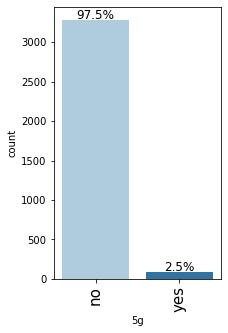

In [34]:
labeled_barplot(df2, "5g", perc=True)

4g seems to be the majority availability. 5g does not seem widely available as there is only 2.5% who have 5g.

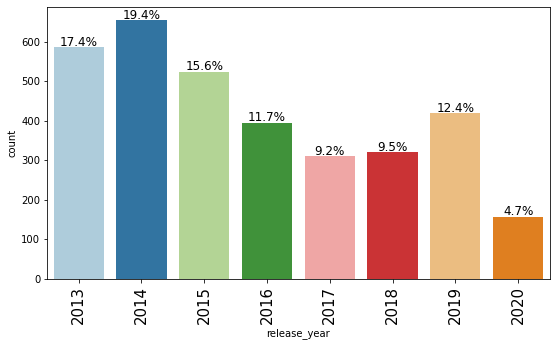

In [35]:
labeled_barplot(df2, "release_year", perc=True)

This is visually appealing as it clearly shows which years the phones were released. The majority of the phones were released from 2013 - 2015.

## Bivariate Analysis

Lets look at correlations.

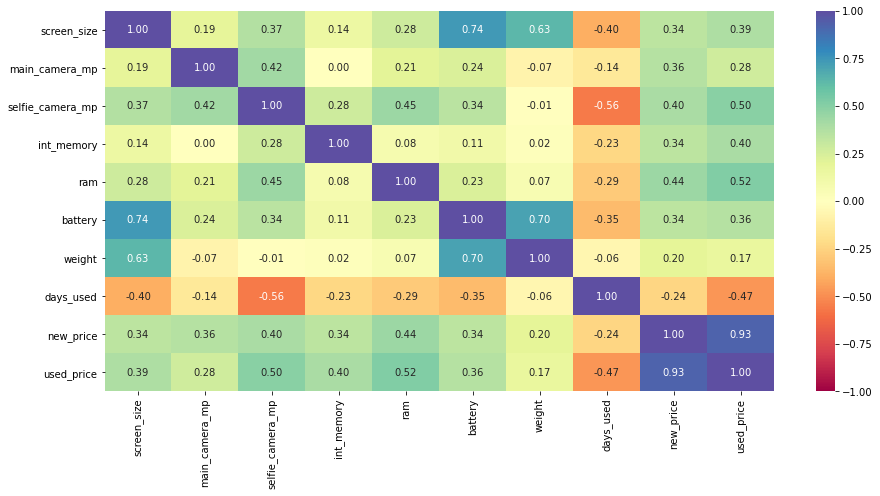

In [36]:
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()


# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

Observations:

    1. The variables with the strongest correlation are used price with new price. Trailing not far behind are battery and screen size. We could also argue that screen size and weight are also very correlated.
    2. There are some high negative correlations such as days used and selfie camera as well as days used and used price.

Lets visually look at these variables that are highly correlated

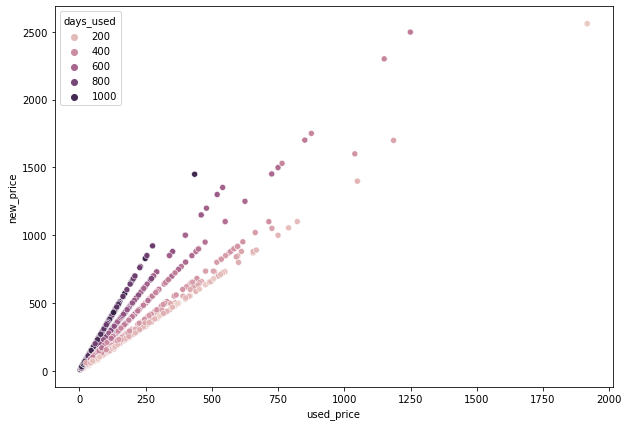

In [37]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="new_price", x="used_price", hue="days_used", data=df2)
plt.show()

The fewer the days used, the higher the price for a used phone or new price. The more the days used, the lower the price for a new phone and used phone. However, the new price is always more expensive, no matter how many days used. 

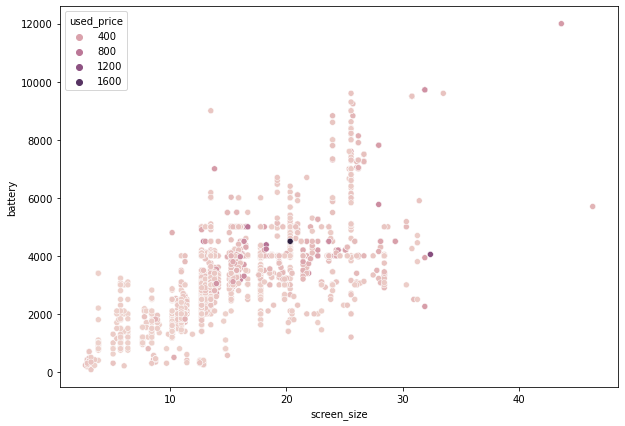

In [38]:
plt.figure(figsize=(10, 7))
sns.scatterplot(y="battery", x="screen_size", hue="used_price", data=df2)
plt.show()

This data appears to have somewhat of a positive line and correlation. The majority of the battery life lies under 6000 mAh and the screen size is mostly below 30 cm.

## Column Binning

I will group together the brand_name column into three different categories. I will bin them into "Low-Cost", "Middle-Cost", and "High-End". 

In [39]:
# Binning phone cost 

conditions = [
(df2["used_price"]<100),
(df2["used_price"].between(100, 400, inclusive=True)),
(df2["used_price"]>400)
]

categories = ['low-cost','middle-cost','high-end']

df2['price_range']=np.select(conditions, categories)
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,price_range
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96,low-cost
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49,middle-cost
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55,middle-cost
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23,middle-cost
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80,middle-cost


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368 entries, 0 to 3570
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3368 non-null   category
 1   os                3368 non-null   category
 2   screen_size       3368 non-null   float64 
 3   4g                3368 non-null   category
 4   5g                3368 non-null   category
 5   main_camera_mp    3368 non-null   float64 
 6   selfie_camera_mp  3368 non-null   float64 
 7   int_memory        3368 non-null   float64 
 8   ram               3368 non-null   float64 
 9   battery           3368 non-null   float64 
 10  weight            3368 non-null   float64 
 11  release_year      3368 non-null   category
 12  days_used         3368 non-null   int64   
 13  new_price         3368 non-null   float64 
 14  used_price        3368 non-null   float64 
 15  price_range       3368 non-null   object  
dtypes: category(5), float64(

In [41]:
df2agg=df2.groupby(["brand_name", "price_range"]).mean()

#df2agg = df2.groupby('brand_name')["price_range"]
df2agg.head(20)

screen_size  main_camera_mp  selfie_camera_mp  \
brand_name price_range                                                  
Acer       high-end             NaN             NaN               NaN   
           low-cost       14.877442        6.403488          2.353488   
           middle-cost    17.223750       10.000000          3.125000   
Alcatel    high-end             NaN             NaN               NaN   
           low-cost       12.859279        5.822523          2.191892   
           middle-cost    15.262857       10.307143          2.807143   
Apple      high-end       20.192667       10.666667          6.480000   
           low-cost       11.430000        9.500000          2.800000   
           middle-cost    15.522895        9.947368          4.600000   
Asus       high-end       13.970000       13.000000          5.000000   
           low-cost       15.177375        9.351875          3.775000   
           middle-cost    15.810750       11.175000          5.280000   
BlackBerry high-end             NaN             NaN               NaN   
           low-cost       10.623846        9.615385          2.853846   
           middle-cost    11.238000       12.200000          5.600000   
Celkon     high-end             NaN             NaN               NaN   
           low-cost        9.554054        3.597297          0.635135   
           middle-cost          NaN             NaN               NaN   
Coolpad    high-end             NaN             NaN               NaN   
           low-cost       13.036000       10.666667          5.800000   

                        int_memory       ram      battery      weight  \
brand_name price_range                                                  
Acer       high-end            NaN       NaN          NaN         NaN   
           low-cost      23.441860  3.883721  2845.581395  225.753488   
           middle-cost   22.000000  4.000000  3827.500000  226.512500   
Alcatel    high-end            NaN       NaN          NaN         NaN   
           low-cost      37.477477  3.353604  2335.315315  167.145946   
           middle-cost   26.285714  4.000000  2853.571429  161.071429   
Apple      high-end     188.800000  4.266667  4001.833333  318.226667   
           low-cost      24.000000  4.000000  1726.500000  106.833333   
           middle-cost   37.052632  3.894737  3606.763158  207.239474   
Asus       high-end      80.000000  4.000000  3200.000000  170.500000   
           low-cost      40.000000  3.950000  3206.000000  212.393750   
           middle-cost   68.400000  4.100000  3662.775000  225.985000   
BlackBerry high-end            NaN       NaN          NaN         NaN   
           low-cost      60.307692  3.711538  2553.461538  159.730769   
           middle-cost   51.200000  4.000000  2880.000000  158.400000   
Celkon     high-end            NaN       NaN          NaN         NaN   
           low-cost     219.675676  1.466216  1459.459459  135.202703   
           middle-cost         NaN       NaN          NaN         NaN   
Coolpad    high-end            NaN       NaN          NaN         NaN   
           low-cost      24.533333  4.000000  2681.333333  147.760000   

                         days_used    new_price  used_price  
brand_name price_range                                       
Acer       high-end            NaN          NaN         NaN  
           low-cost     825.069767   155.908837   54.084419  
           middle-cost  639.250000   264.021250  116.011250  
Alcatel    high-end            NaN          NaN         NaN  
           low-cost     766.846847   119.816815   45.024955  
           middle-cost  639.928571   322.337143  136.999286  
Apple      high-end     480.400000  1025.516100  552.855333  
           low-cost     875.833333   287.141667   90.283333  
           middle-cost  682.710526   541.992105  222.788684  
Asus       high-end     574.500000   974.880000  437.470000  
           low-cost     812.687500   176.791625   61.017250  
    

EDA continued

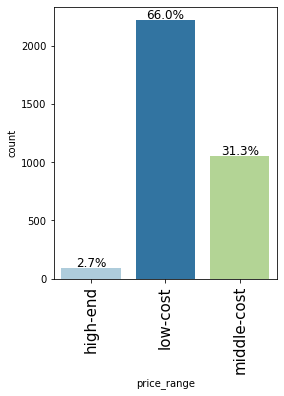

In [42]:
labeled_barplot(df2, "price_range", perc=True)

There are very few phones that are considered high end. Most used phones fall within the low-cost range.

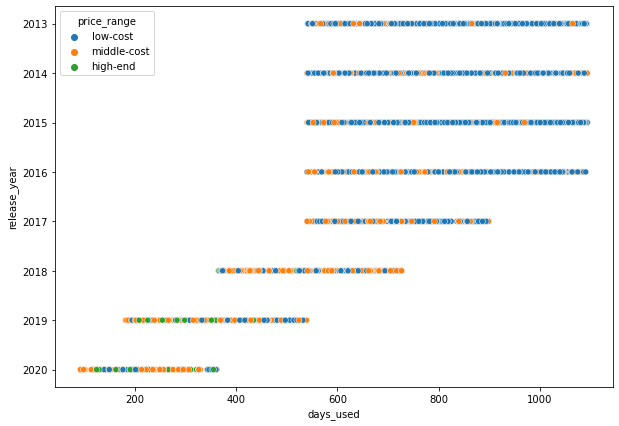

In [45]:
#I would like to compare release year vs days used vs price range
plt.figure(figsize=(10, 7))
sns.scatterplot(y="release_year", x="days_used", hue="price_range", data=df2)
plt.show()

You can see that the earlier the phone was released, the more likely it was a low-cost or middle-cost phone. You also see that the earlier the phone was released, between 2013 and 2017, that phones were being used on average for more than approximately 550 days. 

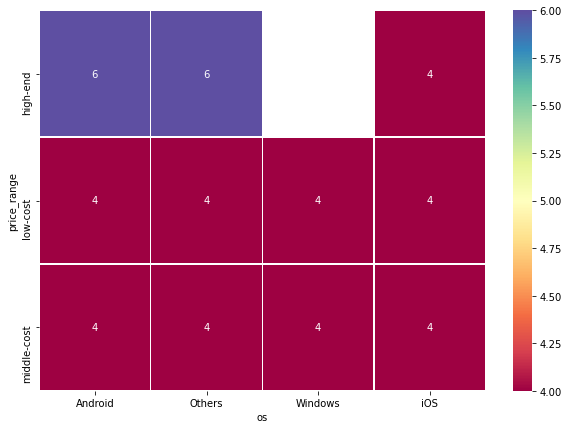

In [46]:
df_hm = df2.pivot_table(
    index="price_range", columns="os", values="ram", aggfunc=np.median
)

# Draw a heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df_hm, cmap="Spectral", linewidths=0.5, annot=True, ax=ax)
plt.show()

The high-end phones use mostly Android or other. The low to middle cost phones use all types of os. 

## Outlier Detection

Let's look at outliers in every numerical column

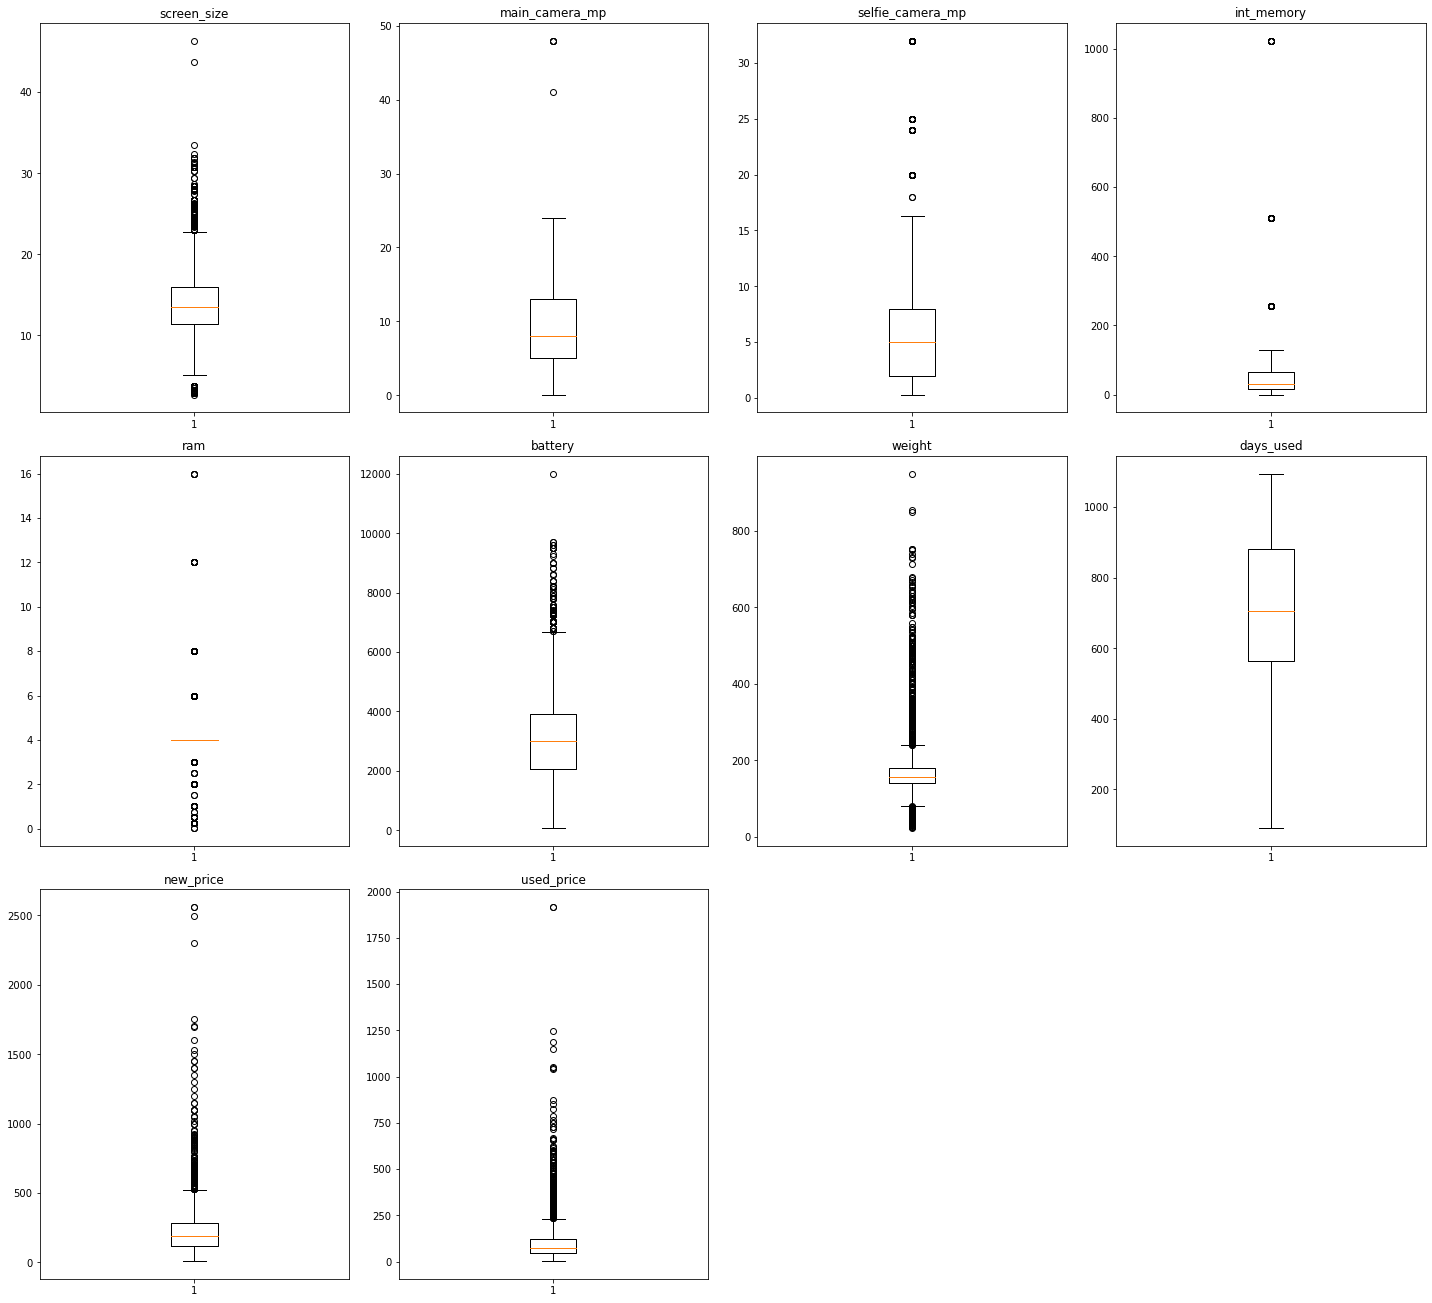

In [47]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
    
    There are high and low outliers in screen_size, ram, and weight.
    There are just high outliers in main_camera_mp, selfie_camera_mp, int_memory, battery, new_price, and used_price.
    The only one that doesn't have any ouliers is days_used.
    No variable has just low outliers, it is either high and low outliers or just high outliers.
    We will treat the outliers as if they would affect the linear model.

Outlier Treatment

I will use flooring and capping to treat the outliers.

In [48]:
def treat_outliers(df2, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df2[col].quantile(0.25)  # 25th quantile
    Q3 = df2[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df2[col] = np.clip(df2[col], Lower_Whisker, Upper_Whisker)

    return df2


def treat_outliers_all(df2, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df2 = treat_outliers(df2, c)

    return df2

In [49]:
# treating the outliers
numerical_col = df2.select_dtypes(include=np.number).columns.tolist()
df2 = treat_outliers_all(df2, numerical_col)

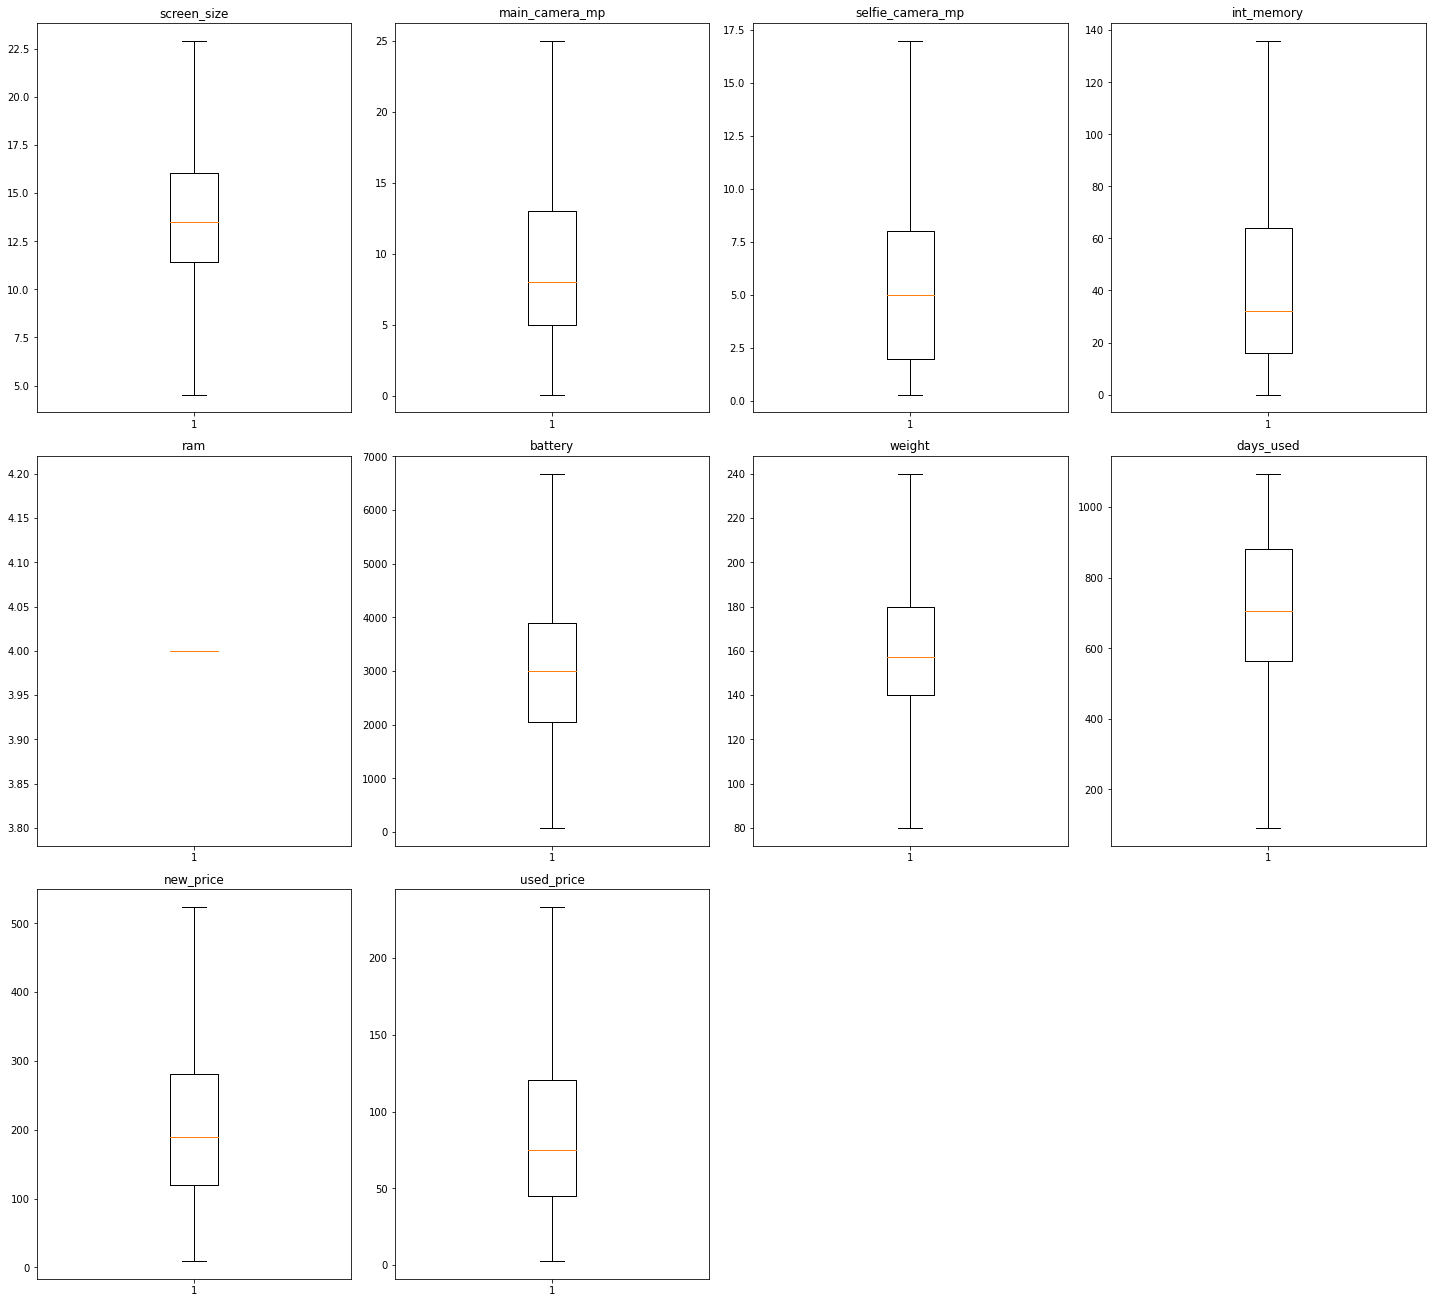

In [45]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

The outliers have successfully been removed and treated.

In [50]:
pd.qcut(df2['used_price'], q=3)

0        (52.527, 100.35]
1       (100.35, 233.229]
2       (100.35, 233.229]
3       (100.35, 233.229]
4       (100.35, 233.229]
              ...        
3564    (100.35, 233.229]
3567    (100.35, 233.229]
3568     (52.527, 100.35]
3569     (52.527, 100.35]
3570      (2.509, 52.527]
Name: used_price, Length: 3368, dtype: category
Categories (3, interval[float64]): [(2.509, 52.527] < (52.527, 100.35] < (100.35, 233.229]]

With the cutting of the outliers, the data no longer has any high-cost phones. The highest phone is now at 233 euros. Therefore, I will redefine the bins to create the three categories with new prices. 

In [52]:
#I am redefining the categories for low-cost, middle-cost, and high-end brand names. 

conditions = [
(df2["used_price"]<52),
(df2["used_price"].between(52, 100, inclusive=True)),
(df2["used_price"]>100)
]

categories = ['low-cost','middle-cost','high-end']

df2['price_range']=np.select(conditions, categories)
df2.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,price_range
0,Honor,Android,22.93,yes,no,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127,111.62,86.96000,middle-cost
1,Honor,Android,22.93,yes,yes,13.0,16.0,128.0,4.0,4300.0,213.0,2020,325,249.39,161.49000,high-end
2,Honor,Android,22.93,yes,yes,13.0,8.0,128.0,4.0,4200.0,213.0,2020,162,359.47,233.22875,high-end
3,Honor,Android,22.93,yes,yes,13.0,8.0,64.0,4.0,6675.0,240.0,2020,345,278.93,180.23000,high-end
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,293,140.87,103.80000,high-end


## Linear Model Building

We want to predict the price of a used phone and identify factors that significantly influence it.

Before we proceed to build a model, we'll have to encode categorical features.

We'll split the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Linear Regression model using the train data and then check it's performance.

In [57]:
# defining X and y variables
#dropping used price since this is what we are trying to predict
X = df2.drop(["used_price", "4g","5g","os"], axis=1)
y = df2["used_price"]

print(X.head())
print(y.head())

  brand_name  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0      Honor        22.93            13.0               5.0        64.0  4.0   
1      Honor        22.93            13.0              16.0       128.0  4.0   
2      Honor        22.93            13.0               8.0       128.0  4.0   
3      Honor        22.93            13.0               8.0        64.0  4.0   
4      Honor        15.72            13.0               8.0        64.0  4.0   

   battery  weight release_year  days_used  new_price  price_range  
0   3020.0   146.0         2020        127     111.62  middle-cost  
1   4300.0   213.0         2020        325     249.39     high-end  
2   4200.0   213.0         2020        162     359.47     high-end  
3   6675.0   240.0         2020        345     278.93     high-end  
4   5000.0   185.0         2020        293     140.87     high-end  
0     86.96000
1    161.49000
2    233.22875
3    180.23000
4    103.80000
Name: used_price, dtype: float

In [58]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,new_price,brand_name_Alcatel,...,brand_name_ZTE,release_year_2014,release_year_2015,release_year_2016,release_year_2017,release_year_2018,release_year_2019,release_year_2020,price_range_low-cost,price_range_middle-cost
0,22.93,13.0,5.0,64.0,4.0,3020.0,146.0,127,111.62,0,...,0,0,0,0,0,0,0,1,0,1
1,22.93,13.0,16.0,128.0,4.0,4300.0,213.0,325,249.39,0,...,0,0,0,0,0,0,0,1,0,0
2,22.93,13.0,8.0,128.0,4.0,4200.0,213.0,162,359.47,0,...,0,0,0,0,0,0,0,1,0,0
3,22.93,13.0,8.0,64.0,4.0,6675.0,240.0,345,278.93,0,...,0,0,0,0,0,0,0,1,0,0
4,15.72,13.0,8.0,64.0,4.0,5000.0,185.0,293,140.87,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368 entries, 0 to 3570
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   screen_size              3368 non-null   float64
 1   main_camera_mp           3368 non-null   float64
 2   selfie_camera_mp         3368 non-null   float64
 3   int_memory               3368 non-null   float64
 4   ram                      3368 non-null   float64
 5   battery                  3368 non-null   float64
 6   weight                   3368 non-null   float64
 7   days_used                3368 non-null   int64  
 8   new_price                3368 non-null   float64
 9   brand_name_Alcatel       3368 non-null   uint8  
 10  brand_name_Apple         3368 non-null   uint8  
 11  brand_name_Asus          3368 non-null   uint8  
 12  brand_name_BlackBerry    3368 non-null   uint8  
 13  brand_name_Celkon        3368 non-null   uint8  
 14  brand_name_Coolpad      

In [60]:
# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

In [61]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [62]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2357
Number of rows in test data = 1011


In [63]:
# fitting the model on the train data (70% of the whole data)
from sklearn.linear_model import LinearRegression

In [64]:
linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

In [65]:
linearregression.coef_

array([ 3.43250713e-02, -1.87151729e-01,  4.91018173e-01,  5.92854147e-02,
       -9.10679865e-12,  1.31779077e-04,  1.06576851e-02, -6.92978917e-02,
        3.37288549e-01, -9.04656899e-01,  8.00860998e+00,  2.30616467e-01,
        3.40708443e+00, -4.82807284e+00, -3.63286443e+00, -4.01390192e+00,
        1.02891778e+01, -2.23711613e+00,  1.49552611e+00, -8.69693266e-01,
       -5.03688766e-01,  2.46936957e-01, -6.42693238e-01, -2.68550079e+00,
       -3.86381907e+00, -3.56027473e-01, -2.73052572e+00, -2.31405262e+00,
       -1.03093328e+01, -1.02322480e+01, -4.27600814e+00, -4.21409140e-01,
        8.35486244e-01, -1.32724440e+01, -2.12872842e+00, -1.92233842e+00,
        1.55060930e+00,  5.72777865e-02,  2.94686805e+00, -1.03580435e+00,
       -1.15996048e+00, -3.26639335e-01, -3.58902479e-01, -8.31932325e-01,
       -4.24867916e+00,  1.41574854e+00,  4.73597655e+00,  2.51949908e+00,
       -1.66977934e+01, -1.66703838e+01])

In [66]:
#lets check the coefficents and intercepts of the model
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
screen_size,3.432507e-02
main_camera_mp,-1.871517e-01
selfie_camera_mp,4.910182e-01
int_memory,5.928541e-02
ram,-9.106799e-12
battery,1.317791e-04
weight,1.065769e-02
days_used,-6.929789e-02
new_price,3.372885e-01
brand_name_Alcatel,-9.046569e-01


Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and R2.
We will define a function to calculate MAPE and adjusted R2.

The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
We will create a function which will print out all the above metrics in one go.

In [67]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [68]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,12.006673,8.648114,0.961117,0.960274,15.401215


In [69]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,12.156217,8.823566,0.961082,0.959055,14.274823


Observations:
    
    1. The training R2 is 96.1%, indicating that the model explains 96.1% of the variation in the train data. So, the model is not underfitting.
    2. RMSE and MAE on the train and test sets are comparable, which shows that the model is not overfitting.
    3. MAE indicates that our current model is able to predict the price of a used phone within a mean error of 8.8% euros on the test data.
    4. MAPE on the test set suggests we can predict within 14.3% of the price of a used phone.

Linear Regression Using Stats Models

In [70]:
#unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())


                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1164.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:46:24   Log-Likelihood:                -9202.7
No. Observations:                2357   AIC:                         1.851e+04
Df Residuals:                    2307   BIC:                         1.879e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
screen_size               

OBSERVATIONS:


Negative values of the coefficient show that used_price decreases with the decreases of corresponding attribute value.

Positive values of the coefficient show that used_price increases with the increase of corresponding attribute value.

p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

But these variables might contain multicollinearity, which will affect the p-values.

So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

Multicollinearity
There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [72]:
checking_vif(x_train1)

,feature,VIF
0,screen_size,3.353001
1,main_camera_mp,2.377990
2,selfie_camera_mp,3.829377
3,int_memory,2.097310
4,ram,140.252470
5,battery,3.531992
6,weight,2.996637
7,days_used,3.229587
8,new_price,4.265235
9,brand_name_Alcatel,2.911233


Observations:

    1. ram is well over 5, meaning there is high multicollinearity
    2. there are a few brands, such as Huawei, Samsung and others that are higher. However, since a majority of the other brands are well under 5, the brand names will average out under 5. So I will leave those be. 
    
    
While RAM is showing high multicollinearity, I am going to ignore this and proceed otherwise it will significantly affect the model.

Let's move on and check the model performance. 

In [73]:
olsmod1 = sm.OLS(y_train, x_train1).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     1164.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:49:02   Log-Likelihood:                -9202.7
No. Observations:                2357   AIC:                         1.851e+04
Df Residuals:                    2307   BIC:                         1.879e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
screen_size               

Observations:
    
    1. There are quite a few variables that have a higher than 0.05 significance. I will build a model, then drop the column with the highest p-value. 

In [74]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'weight', 'days_used', 'new_price', 'brand_name_Apple', 'brand_name_Google', 'brand_name_Honor', 'brand_name_Nokia', 'brand_name_Oppo', 'release_year_2017', 'release_year_2019', 'price_range_low-cost', 'price_range_middle-cost']


In [75]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [76]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     3797.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:49:40   Log-Likelihood:                -9220.6
No. Observations:                2357   AIC:                         1.847e+04
Df Residuals:                    2341   BIC:                         1.857e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
main_camera_mp            

Now that no feature has a p-value greater than 0.05, we will consider the features in x_train2 as the final ones and olsmod2 as the final model. 

Observations

    1. Our adjusted R-squared is 0.96, so our model is able to explain ~96% of the variance. Our model is good.
    2. The adjusted R-squared in olsmod0 was 0.96. This shows that the variables we dropped were not affecting the model much.

Test for Linearity and Independence:

    I will make a plot of fitted values vs residuals

In [77]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
652,6.48,-9.391994,15.871994
2960,60.00,68.790231,-8.790231
2123,39.82,40.700702,-0.880702
588,50.27,49.527156,0.742844
723,73.33,72.026141,1.303859


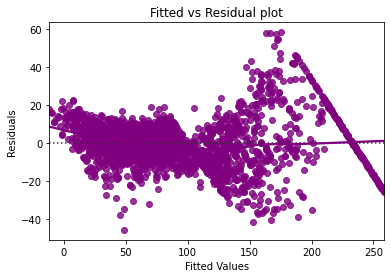

In [78]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

There is no pattern in the plot above. Hence the assumptions of linearity and indepence are satisfied. 

Test for Normality

I will check for the normality by using Q-Q plot of residuals and the Shapiro-Wilk test. 

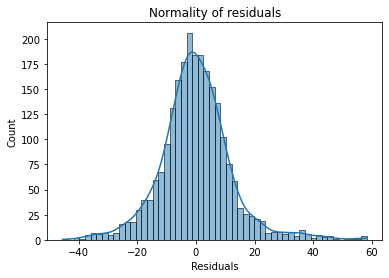

In [79]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

The histogram of residuals does have a bell shape. Now let's try the Q-Q plot. 

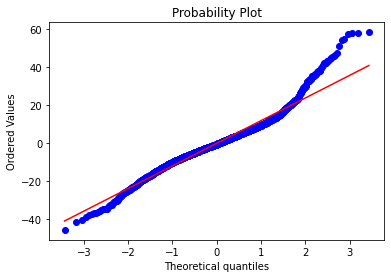

In [80]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

The residuals mostly follows a straight line, except towards the higher end it falls off. Now, let's try Shapiro-Wilk test.

In [81]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9606461524963379, pvalue=8.393142793514584e-25)

Since the p-value is greater than 0.05, the residuals are not normal as per the Shapiro-Wilk test. The residuals are not normal. However, as an approxmation, we can accept this distribution as close to being normal. The assumption is satisfied.

Test for homoscedasticity. I will be looking to see if the variance of the residuals across the regression line

In [82]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.0668775536813437), ('p-value', 0.13495170042996218)]

Since the p-value is greater than 0.05, we can say that the residuals are homoscedastitc. This assumption is satisfied. 

Let's move to the prediction part.

In [83]:
# predictions on the test set
pred = olsmod2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1141,99.77,106.712879
1163,51.43,53.303679
1594,23.58,26.124003
1890,88.37,84.386375
2692,126.32,143.768890
1517,28.38,33.058931
810,65.93,66.345558
2597,200.07,194.649064
3100,99.91,100.315433
51,174.79,177.886950


We can see here that the model has returned pretty good prediction results. The actual and predicted values are comparable. Let's view the comparison results as a bar graph. Since the records are large, I am going to use a sample of 25 records only.

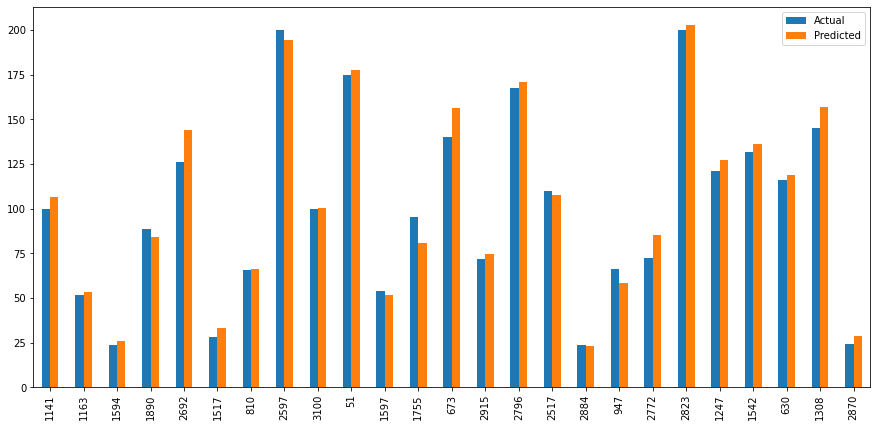

In [84]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [85]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,12.098263,8.736598,0.960521,0.960251,15.679265


In [86]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,12.17737,8.826289,0.960946,0.960318,14.481512


The model is able to explain 96% of the variation in the data, which is great.

The train and test RMSE and MAE are low and comparable. So, our model is not affected by overfitting. 

The MAPE on the test suggests that we can predict within 14.5% of the used phone price. 

Hence, we can conclude that the model olsmod2 is good for prediction as well as interference purposes. 

Let's compare the initial model created with sklearn and the final statsmodels model. 

In [89]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,12.006673,12.098263
MAE,8.648114,8.736598
R-squared,0.961117,0.960521
Adj. R-squared,0.960274,0.960251
MAPE,15.401215,15.679265


In [90]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,12.156217,12.177370
MAE,8.823566,8.826289
R-squared,0.961082,0.960946
Adj. R-squared,0.959055,0.960318
MAPE,14.274823,14.481512


The performance of the twoo models are close to eachother. 

Let's recreate the final statsmodel model and print it's summary to gain insights.

In [91]:
olsmodel_final = sm.OLS(y_train, x_train2).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     3797.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:51:33   Log-Likelihood:                -9220.6
No. Observations:                2357   AIC:                         1.847e+04
Df Residuals:                    2341   BIC:                         1.857e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
main_camera_mp            

Conclusions:
  
  
  1. Days_used comes out to be very significant. The longer someone has used a phone, the used price also will go down. Which makes sense. 
  2. Main camera mp has a negative coefficient, so when the resolutioin of the rear camera in megapixels decreases, so does the used price. This makes so much sense since a lot of people like to have good quality camera to upload photos to social media, share with friends, and keep for themselves. They like to access these photos whenever on their camera. So when the camera quality is bad, the used price will decrease. 
  2. New price and used price are highly correlated. When a new phone is highly priced, it tends to sell for more when it is used/refurbished. 
  3. Apple, Google, and Honor have high coefficients. This makes sense as these brands are in the top brands for cell phones. (Google being the highest by 11.3 euros on average)
  4. Nokia and Oppo have negative coefficients. The used price is low for these brands of phones. 
  5. Ram and int_memory have a high coefficient. People want phones that have a high amount of GB for storage. When ram increases, so does used price.
  6. Used prices for phones in 2019 are more expensive than used prices for phone in 2017, which makes sense since they are much newer and probably have better features and are nicer. 
    